In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv("../datasets/Crop_recommendation.csv")


In [2]:
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  Rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  Rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  Rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  Rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  Rice


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2100 non-null   int64  
 1   P            2100 non-null   int64  
 2   K            2100 non-null   int64  
 3   temperature  2100 non-null   float64
 4   humidity     2100 non-null   float64
 5   ph           2100 non-null   float64
 6   rainfall     2100 non-null   float64
 7   label        2100 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 131.4+ KB
None


In [4]:
# Data Exploration
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


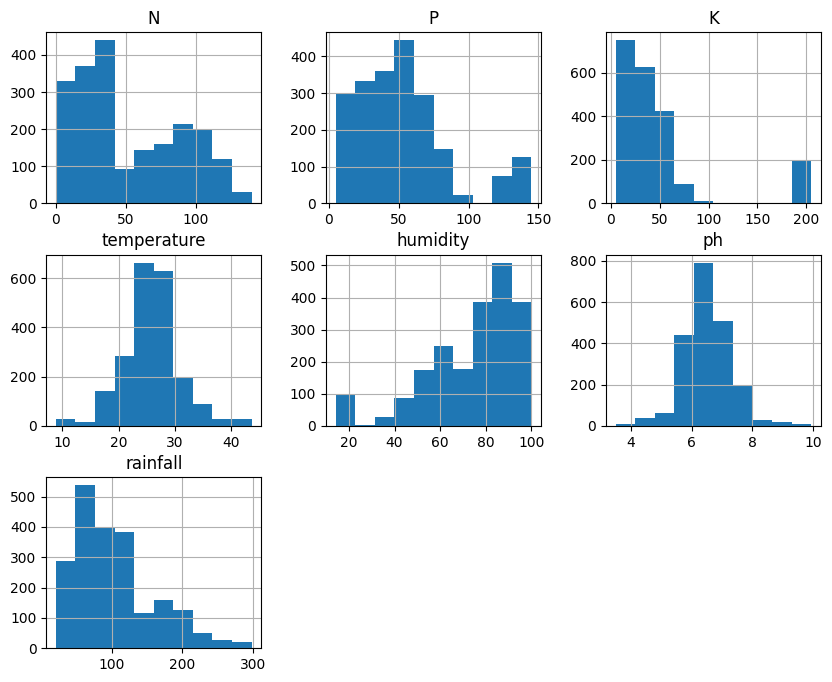

In [5]:
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
df.hist(figsize=(10, 8))
plt.show()

In [6]:
# Imbalance Checking 
print(df['label'].value_counts()) 

label
Rice                         100
Maize                        100
Bengal Gram (Gram)(Whole)    100
Pegeon Pea (Arhar Fali)      100
Moath Dal                    100
Green Gram (Moong)(Whole)    100
Black Gram Dal (Urd Dal)     100
Lentil (Masur)(Whole)        100
Pomegranate                  100
Banana                       100
Mango                        100
Grapes                       100
Water Melon                  100
Karbuja (Musk Melon)         100
Apple                        100
Orange                       100
Papaya                       100
Coconut                      100
Cotton                       100
Jute                         100
Coffee                       100
Name: count, dtype: int64


In [7]:
# Label Encoding 

from sklearn.preprocessing import LabelEncoder

# Encode crop labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [8]:
# Normalising Numerical Values
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
df[['N', 'P', 'K', 'ph', 'humidity']] = scaler.fit_transform(df[['N', 'P', 'K', 'ph', 'humidity']])

In [9]:
# Data Spliting 
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = df.drop('label', axis=1)
y = df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
selected_features = ['N', 'P', 'K', 'ph', 'humidity', 'rainfall', 'temperature']
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

In [12]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
import pandas as pd

# Load the dataset (update the path as needed)
df = pd.read_csv("crop_recommendation.csv")

# Get the range (min and max values) for each column grouped by crop
def get_crop_ranges(df):
    crop_ranges = df.groupby("label").agg({
        col: ["min", "max"] for col in df.columns if col != "label"
    })
    return crop_ranges

# Compute ranges
crop_ranges = get_crop_ranges(df)

# Display the result
print(crop_ranges)

# Save the results to a CSV file
crop_ranges.to_csv("crop_ranges.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'crop_recommendation.csv'

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../datasets/sub_crop_data/banana_subcrop_data.csv')

# List all distinct sub-crops
distinct_subcrops = df['sub-crop'].unique()  # Get unique values
print("Distinct sub-crops:", distinct_subcrops)


In [ ]:
import pandas as pd

# Load the dataset
file_path = "../datasets/sub_crop_data/blackgram_subcrop_data.csv"
df = pd.read_csv(file_path)

# Define the mapping for label replacement
label_mapping = {
    "Urad Dal (Vigna Mungo)": "Black Gram",
    "Basmati Rice": "Paddy(Dhan)(Basmati)",
    "Sapota" : "Chickoos"

}

# Apply the mapping to the 'label' column
df["sub-crop"] = df["sub-crop"].replace(label_mapping)

# Remove rows where 'label' is 'kidneybean'
df = df[df["sub-crop"] != "Honeydew Melon"]

# Save the modified dataset
df.to_csv(file_path, index=False)

print("CSV file updated successfully!")


In [ ]:
# Imbalance Checking 
print(df['sub-crop'].value_counts()) 

In [ ]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle  # For saving the model

# Step 2: Load the Dataset
# Assuming you’ve downloaded the dataset from Kaggle: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
data = pd.read_csv('../datasets/Crop_recommendation.csv')  # Replace with your file path

# Step 3: Explore the Dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())
print("\nUnique Crops:", data['label'].unique())  # 'label' is the target column with crop names

# Step 4: Preprocess the Data
# Features (N, P, K, temperature, humidity, pH, rainfall)
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
# Target (crop names)
y = data['label']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees as a good default
rf_model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")  # Should be close to 99.5% as per your paper

# Step 7: Save the Model for Deployment
with open('main_crop_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
print("Model saved as 'main_crop_model.pkl'")

# Step 8: Function to Predict Crop (For User Input)
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):
    # Load the saved model
    with open('main_crop_model.pkl', 'rb') as file:
        model = pickle.load(file)
    
    # Prepare input data as a 2D array (since model expects a matrix)
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    
    # Make prediction
    predicted_crop = model.predict(input_data)[0]
    return predicted_crop

# Example Prediction
# Test with sample input (replace with actual values)
sample_input = [90, 42, 43, 20.8, 82.0, 6.5, 202.9]  # Example: N, P, K, temp, humidity, pH, rainfall
predicted_crop = predict_crop(*sample_input)
print(f"Predicted Crop: {predicted_crop}")

# Optional: Create a Crop Dictionary for Interpretability (as mentioned in your paper)
crop_dict = {i: crop for i, crop in enumerate(data['label'].unique())}
print("\nCrop Dictionary:", crop_dict)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import warnings

# Suppress sklearn warnings (optional, remove if you want to see them)
warnings.filterwarnings("ignore", category=UserWarning)

# Step 1: Load and Train the Model (Run Once)
def train_and_save_model():
    # Load the dataset
    data = pd.read_csv('../datasets/Crop_recommendation.csv')  # Your file path
    
    # Features and target
    X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    y = data['label']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Evaluate
    y_pred = rf_model.predict(X_test)
    print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    
    # Save the model
    with open('main_crop_model.pkl', 'wb') as file:
        pickle.dump(rf_model, file)
    print("Model saved as 'main_crop_model.pkl'")
    
    return rf_model

# Step 2: Define Realistic Ranges
realistic_ranges = {
    'N': (0, 200), 'P': (0, 200), 'K': (0, 250), 'temperature': (5, 50),
    'humidity': (0, 100), 'ph': (3, 11), 'rainfall': (0, 500)
}

# Step 3: Input Validation and Preprocessing
def validate_and_preprocess_input(N, P, K, temperature, humidity, ph, rainfall):
    inputs = {'N': N, 'P': P, 'K': K, 'temperature': temperature, 
              'humidity': humidity, 'ph': ph, 'rainfall': rainfall}
    
    # Check and convert input types
    for param, val in inputs.items():
        try:
            inputs[param] = float(val)  # Convert to float, catch invalid types
        except (ValueError, TypeError):
            return False, f"Invalid input: {param} must be a number"
    
    # Validate and cap values
    capped_inputs = {}
    warnings_list = []
    for param, val in inputs.items():
        min_val, max_val = realistic_ranges[param]
        if val < min_val or val > max_val:
            warnings_list.append(f"{param} ({val}) outside realistic range ({min_val}-{max_val}), capped")
            capped_inputs[param] = max(min_val, min(val, max_val))
        else:
            capped_inputs[param] = val
    
    return True, capped_inputs, warnings_list

# Step 4: Robust Prediction Function
def predict_crop_robust(N, P, K, temperature, humidity, ph, rainfall, confidence_threshold=0.7):
    try:
        # Load the model
        with open('main_crop_model.pkl', 'rb') as file:
            model = pickle.load(file)
        
        # Validate and preprocess input
        is_valid, capped_inputs_or_error, warnings = validate_and_preprocess_input(
            N, P, K, temperature, humidity, ph, rainfall
        )
        if not is_valid:
            return {"error": capped_inputs_or_error, "prediction": None, "confidence": 0}
        
        # Prepare input as DataFrame to match training format
        input_df = pd.DataFrame([[
            capped_inputs_or_error['N'], capped_inputs_or_error['P'], capped_inputs_or_error['K'],
            capped_inputs_or_error['temperature'], capped_inputs_or_error['humidity'],
            capped_inputs_or_error['ph'], capped_inputs_or_error['rainfall']
        ]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
        
        # Predict crop and confidence
        predicted_crop = model.predict(input_df)[0]
        probabilities = model.predict_proba(input_df)[0]
        max_prob = float(max(probabilities))  # Convert np.float64 to float
        
        # Decision logic
        result = {
            "prediction": predicted_crop,
            "confidence": max_prob,
            "warnings": warnings if warnings else None
        }
        
        if max_prob < confidence_threshold:
            result["message"] = (f"Low confidence ({max_prob:.2f} < {confidence_threshold}). "
                                "Prediction may be unreliable. Consider a general crop like 'maize'.")
        
        return result
    
    except FileNotFoundError:
        return {"error": "Model file 'main_crop_model.pkl' not found", "prediction": None, "confidence": 0}
    except Exception as e:
        return {"error": f"Prediction failed: {str(e)}", "prediction": None, "confidence": 0}

# Step 5: Test the Robust Model
if __name__ == "__main__":
    # Train the model (run once, comment out after)
    train_and_save_model()
    
    # Test cases
    test_cases = [
        [91,43,44,20,85,7,200],  # Normal input
        [500, 200, 300, 50.0, 10.0, 14.0, 1000.0],  # Extreme input
        [-10, 50, 60, 25.0, 75.0, 7.0, 150.0],  # Negative value
        [100, "invalid", 60, 25.0, 75.0, 7.0, 150.0]  # Invalid type
    ]
    
    for i, test_input in enumerate(test_cases, 1):
        print(f"\nTest Case {i}: {test_input}")
        result = predict_crop_robust(*test_input)
        print(f"Result: {result}")

# Train With Other Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import pandas as pd

def compare_models():
    # Load dataset
    data = pd.read_csv('../datasets/Crop_recommendation.csv')
    X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    y = data['label']
    
    # Encode string labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
        "SVM (Linear)": SVC(kernel='linear', probability=True),
        "SVM (RBF)": SVC(kernel='rbf', probability=True),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Naive Bayes": GaussianNB(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    }

    # Compare model accuracies
    print("\n--- Model Accuracy Comparison ---")
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        print(f"{name}: {acc * 100:.2f}%")

compare_models()

# Save Model Comparison as PDF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, PageBreak
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.platypus import PageTemplate, Frame, NextPageTemplate
from reportlab.platypus.flowables import KeepTogether
from reportlab.graphics.shapes import Line
from datetime import datetime

def compare_models():
    # Load dataset
    data = pd.read_csv('../datasets/Crop_recommendation.csv')
    X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    y = data['label']
    
    # Encode string labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
        "SVM (Linear)": SVC(kernel='linear', probability=True),
        "SVM (RBF)": SVC(kernel='rbf', probability=True),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Naive Bayes": GaussianNB(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    }

    # Store results
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results.append((name, acc * 100))
    
    return results

def header(canvas, doc):
    canvas.saveState()
    canvas.setFont('Helvetica-Bold', 10)
    canvas.setFillColor(colors.darkgreen)
    canvas.drawString(inch, doc.pagesize[1] - 0.75 * inch, "Crop Combination Recommendation and Price Prediction")
    canvas.setFont('Helvetica', 8)
    canvas.setFillColor(colors.grey)
    canvas.drawRightString(doc.pagesize[0] - inch, doc.pagesize[1] - 0.75 * inch, f"Page {doc.page}")
    canvas.line(inch, doc.pagesize[1] - 0.85 * inch, doc.pagesize[0] - inch, doc.pagesize[1] - 0.85 * inch)
    canvas.restoreState()

def generate_pdf_report(results, output_filename="Crop_Recommendation_Model_Comparison_Report.pdf"):
    # Set up PDF document
    doc = SimpleDocTemplate(output_filename, pagesize=letter, rightMargin=inch, leftMargin=inch, topMargin=1.5 * inch, bottomMargin=inch)
    styles = getSampleStyleSheet()

    # Custom styles
    cover_title_style = ParagraphStyle(
        name='CoverTitle',
        fontName='Helvetica-Bold',
        fontSize=18,
        textColor=colors.darkgreen,
        alignment=1,  # Center
        spaceAfter=12
    )
    cover_subtitle_style = ParagraphStyle(
        name='CoverSubtitle',
        fontName='Helvetica',
        fontSize=12,
        textColor=colors.black,
        alignment=1,  # Center
        spaceAfter=8
    )
    heading_style = ParagraphStyle(
        name='Heading2',
        fontName='Helvetica-Bold',
        fontSize=14,
        textColor=colors.darkblue,
        spaceBefore=12,
        spaceAfter=6
    )
    body_style = ParagraphStyle(
        name='BodyText',
        fontName='Times-Roman',
        fontSize=10,
        leading=12,
        spaceAfter=8,
        alignment=4,  # Justified
        wordWrap='CJK'  # Better handling of long text
    )

    # Elements for the document
    elements = []

    # Cover page
    elements.append(Spacer(1, 2 * inch))
    elements.append(Paragraph("Crop Combination Recommendation and Price Prediction", cover_title_style))
    elements.append(Paragraph("CS6611 Creative and Innovative Project", cover_subtitle_style))
    elements.append(Paragraph("Submitted by: [Your Name]", cover_subtitle_style))
    elements.append(Paragraph(f"Date: {datetime.now().strftime('%Y-%m-%d')}", cover_subtitle_style))
    elements.append(Spacer(1, 2.5 * inch))
    elements.append(Paragraph("Department of Computer Science", cover_subtitle_style))
    elements.append(Paragraph("[Your University Name]", cover_subtitle_style))
    elements.append(PageBreak())

    # Content page template with header
    frame = Frame(doc.leftMargin, doc.bottomMargin, doc.width, doc.height - 1 * inch)
    template = PageTemplate(id='content', frames=[frame], onPage=header)
    doc.addPageTemplates([template])
    elements.append(NextPageTemplate('content'))

    # Introduction
    elements.append(Paragraph("Introduction", heading_style))
    elements.append(Paragraph(
        "This report is part of the CS6611 Creative and Innovative Project, titled 'Crop Combination Recommendation and Price Prediction.' "
        "The project aims to leverage machine learning to recommend suitable crops based on soil and environmental factors and predict their market prices. "
        "This analysis focuses on evaluating various classification models to recommend crops using the Crop Recommendation dataset, which includes features such as "
        "Nitrogen (N), Phosphorus (P), Potassium (K), temperature, humidity, pH, and rainfall.",
        body_style
    ))
    elements.append(Spacer(1, 12))

    # Methodology
    elements.append(Paragraph("Methodology", heading_style))
    elements.append(Paragraph(
        "The dataset was preprocessed to encode categorical crop labels numerically using LabelEncoder. "
        "It was then split into 80% training and 20% testing sets with a fixed random seed for reproducibility. "
        "The following models were evaluated: Logistic Regression, K-Nearest Neighbors (KNN with k=5), Support Vector Machine (SVM) with linear and RBF kernels, "
        "Decision Tree, Random Forest, Naive Bayes, and XGBoost. Model performance was assessed using accuracy on the test set.",
        body_style
    ))
    elements.append(Spacer(1, 12))

    # Results
    elements.append(Paragraph("Results", heading_style))
    elements.append(Paragraph(
        "The table below presents the accuracy of each model on the test set, indicating their effectiveness in crop recommendation.",
        body_style
    ))
    elements.append(Spacer(1, 12))

    # Results table with adjusted column widths
    total_width = doc.width  # Available width after margins
    colWidths = [total_width * 0.65, total_width * 0.35]  # 65% for model name, 35% for accuracy
    table_data = [["Model", "Accuracy (%)"]] + [[name, f"{acc:.2f}"] for name, acc in results]
    table = Table(table_data, colWidths=colWidths, rowHeights=[0.4 * inch] * (len(table_data)))
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.darkgreen),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, -1), 10),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 8),
        ('TOPPADDING', (0, 0), (-1, -1), 8),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('BACKGROUND', (0, 2), (-1, 2), colors.lightgrey),
        ('BACKGROUND', (0, 4), (-1, 4), colors.lightgrey),
        ('BACKGROUND', (0, 6), (-1, 6), colors.lightgrey),
        ('BACKGROUND', (0, 8), (-1, 8), colors.lightgrey),
        ('GRID', (0, 0), (-1, -1), 0.5, colors.black),
        ('LEFTPADDING', (0, 0), (-1, -1), 6),
        ('RIGHTPADDING', (0, 0), (-1, -1), 6),
    ]))
    elements.append(KeepTogether(table))
    elements.append(Spacer(1, 12))

    # Discussion
    elements.append(Paragraph("Discussion", heading_style))
    elements.append(Paragraph(
        "The results highlight the superior performance of ensemble methods like Random Forest and XGBoost, which achieved accuracies above 98%. "
        "These models likely benefit from their ability to model complex, non-linear relationships in the data. "
        "KNN and SVM (RBF) also performed well, indicating the presence of localized and non-linear patterns. "
        "Decision Tree and Naive Bayes had lower accuracies, possibly due to overfitting and the assumption of feature independence, respectively. "
        "These findings suggest that ensemble methods are well-suited for crop recommendation tasks in this project.",
        body_style
    ))
    elements.append(Spacer(1, 12))

    # Conclusion
    elements.append(Paragraph("Conclusion", heading_style))
    elements.append(Paragraph(
        "This analysis, conducted as part of the CS6611 project, demonstrates the effectiveness of machine learning models in recommending crops based on environmental and soil data. "
        "Ensemble methods like Random Forest and XGBoost are recommended for their high accuracy. "
        "Future work will focus on integrating price prediction models and exploring additional features to enhance the system's applicability in agricultural decision-making.",
        body_style
    ))

    # Build PDF
    doc.build(elements)
    print(f"Report generated: {output_filename}")

# Run comparison and generate report
results = compare_models()
generate_pdf_report(results)

# Overall Models Performance Metrics Calculation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import pandas as pd
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from datetime import datetime

def compare_models():
    # Load dataset
    data = pd.read_csv('../datasets/Crop_recommendation.csv')
    X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    y = data['label']
    
    # Encode string labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

    # Define models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
        "SVM (Linear)": SVC(kernel='linear', probability=True),
        "SVM (RBF)": SVC(kernel='rbf', probability=True),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Naive Bayes": GaussianNB(),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    }

    # Store results
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        results.append((name, acc * 100))
    
    return results

def generate_pdf_report(results, output_filename="Model_Comparison_Report.pdf"):
    # Set up PDF document
    doc = SimpleDocTemplate(output_filename, pagesize=letter)
    styles = getSampleStyleSheet()
    elements = []

    # Custom styles
    title_style = styles['Title']
    heading_style = styles['Heading2']
    body_style = ParagraphStyle(
        name='BodyText',
        parent=styles['Normal'],
        fontSize=10,
        leading=12,
        spaceAfter=8
    )

    # Title
    elements.append(Paragraph("Machine Learning Model Comparison Report", title_style))
    elements.append(Spacer(1, 12))
    elements.append(Paragraph(f"Generated on: {datetime.now().strftime('%Y-%m-%d')}", body_style))
    elements.append(Spacer(1, 24))

    # Introduction
    elements.append(Paragraph("Introduction", heading_style))
    elements.append(Paragraph(
        "This report presents a comparative analysis of various machine learning models applied to the Crop Recommendation dataset. "
        "The dataset includes features such as Nitrogen (N), Phosphorus (P), Potassium (K), temperature, humidity, pH, and rainfall, "
        "used to predict the most suitable crop for given conditions. The goal is to evaluate the accuracy of different classification models.",
        body_style
    ))
    elements.append(Spacer(1, 12))

    # Methodology
    elements.append(Paragraph("Methodology", heading_style))
    elements.append(Paragraph(
        "The dataset was split into 80% training and 20% testing sets with a random seed for reproducibility. "
        "The following models were evaluated: Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM) with linear and RBF kernels, "
        "Decision Tree, Random Forest, Naive Bayes, and XGBoost. Accuracy was used as the performance metric, calculated on the test set. "
        "Categorical crop labels were encoded numerically using LabelEncoder to ensure compatibility with all models.",
        body_style
    ))
    elements.append(Spacer(1, 12))

    # Results
    elements.append(Paragraph("Results", heading_style))
    elements.append(Paragraph(
        "The table below summarizes the accuracy of each model on the test set.",
        body_style
    ))
    elements.append(Spacer(1, 12))

    # Create table for results
    table_data = [["Model", "Accuracy (%)"]] + [[name, f"{acc:.2f}"] for name, acc in results]
    table = Table(table_data)
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('FONTSIZE', (0, 0), (-1, -1), 10),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
        ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ]))
    elements.append(table)
    elements.append(Spacer(1, 12))

    # Discussion
    elements.append(Paragraph("Discussion", heading_style))
    elements.append(Paragraph(
        "The results indicate that ensemble methods like Random Forest and XGBoost achieved the highest accuracies, likely due to their ability to capture complex patterns in the data. "
        "KNN and SVM (RBF) also performed well, suggesting that non-linear relationships are present in the dataset. "
        "Decision Tree and Naive Bayes had lower accuracies, possibly due to overfitting and the assumption of feature independence, respectively. "
        "Future work could involve hyperparameter tuning, cross-validation, or additional metrics like precision and recall to further evaluate model performance.",
        body_style
    ))
    elements.append(Spacer(1, 12))

    # Conclusion
    elements.append(Paragraph("Conclusion", heading_style))
    elements.append(Paragraph(
        "This analysis provides a comprehensive comparison of machine learning models for crop recommendation. "
        "Ensemble methods are recommended for this task due to their superior performance. The results can guide agricultural decision-making and future model optimization.",
        body_style
    ))

    # Build PDF
    doc.build(elements)
    print(f"Report generated: {output_filename}")

# Run comparison and generate report
results = compare_models()
generate_pdf_report(results)

# Performance metrics calculation

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle
import warnings

# Suppress sklearn warnings (optional, remove if you want to see them)
warnings.filterwarnings("ignore", category=UserWarning)

# Step 1: Load and Train the Model with Comprehensive Evaluation
def train_and_save_model():
    # Load the dataset
    data = pd.read_csv('../datasets/Crop_recommendation.csv')  # Your file path
    
    # Features and target
    X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    y = data['label']
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Evaluate on test set
    y_pred = rf_model.predict(X_test)
    probabilities = rf_model.predict_proba(X_test)
    confidences = np.max(probabilities, axis=1)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0) * 100
    precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0) * 100
    recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0) * 100
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0) * 100
    avg_confidence = np.mean(confidences)
    low_confidence_rate = np.sum(confidences < 0.7) / len(confidences) * 100
    
    # Confusion Matrix Statistics
    cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
    cm_stats = {}
    for i, class_name in enumerate(rf_model.classes_):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - (tp + fp + fn)
        cm_stats[class_name] = {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn}
    
    # Find common misclassifications (top off-diagonal elements)
    misclassifications = []
    cm_array = cm.copy()
    np.fill_diagonal(cm_array, 0)
    for _ in range(min(5, cm_array.size)):  # Top 5 misclassifications
        max_idx = np.argmax(cm_array)
        if cm_array.flat[max_idx] == 0:
            break
        row, col = np.unravel_index(max_idx, cm_array.shape)
        misclassifications.append(
            f"{rf_model.classes_[row]} misclassified as {rf_model.classes_[col]} ({cm_array[row, col]} times)"
        )
        cm_array[row, col] = 0
    
    metrics = {
        'Accuracy (%)': accuracy,
        'Precision (Macro) (%)': precision_macro,
        'Precision (Weighted) (%)': precision_weighted,
        'Recall (Macro) (%)': recall_macro,
        'Recall (Weighted) (%)': recall_weighted,
        'F1-Score (Macro) (%)': f1_macro,
        'F1-Score (Weighted) (%)': f1_weighted,
        'Average Confidence': avg_confidence,
        'Low Confidence Rate (%)': low_confidence_rate
    }
    
    # Save the model
    with open('main_crop_model.pkl', 'wb') as file:
        pickle.dump(rf_model, file)
    
    return metrics, cm_stats, misclassifications, rf_model

# Step 2: Define Realistic Ranges
realistic_ranges = {
    'N': (0, 200), 'P': (0, 200), 'K': (0, 250), 'temperature': (5, 50),
    'humidity': (0, 100), 'ph': (3, 11), 'rainfall': (0, 500)
}

# Step 3: Input Validation and Preprocessing
def validate_and_preprocess_input(N, P, K, temperature, humidity, ph, rainfall):
    inputs = {'N': N, 'P': P, 'K': K, 'temperature': temperature, 
              'humidity': humidity, 'ph': ph, 'rainfall': rainfall}
    
    # Check and convert input types
    for param, val in inputs.items():
        try:
            inputs[param] = float(val)
        except (ValueError, TypeError):
            return False, f"Invalid input: {param} must be a number"
    
    # Validate and cap values
    capped_inputs = {}
    warnings_list = []
    for param, val in inputs.items():
        min_val, max_val = realistic_ranges[param]
        if val < min_val or val > max_val:
            warnings_list.append(f"{param} ({val}) outside realistic range ({min_val}-{max_val}), capped")
            capped_inputs[param] = max(min_val, min(val, max_val))
        else:
            capped_inputs[param] = val
    
    return True, capped_inputs, warnings_list

# Step 4: Robust Prediction Function
def predict_crop_robust(N, P, K, temperature, humidity, ph, rainfall, confidence_threshold=0.7):
    try:
        # Load the model
        with open('main_crop_model.pkl', 'rb') as file:
            model = pickle.load(file)
        
        # Validate and preprocess input
        is_valid, capped_inputs_or_error, warnings = validate_and_preprocess_input(
            N, P, K, temperature, humidity, ph, rainfall
        )
        if not is_valid:
            return {"error": capped_inputs_or_error, "prediction": None, "confidence": 0}
        
        # Prepare input as DataFrame
        input_df = pd.DataFrame([[
            capped_inputs_or_error['N'], capped_inputs_or_error['P'], capped_inputs_or_error['K'],
            capped_inputs_or_error['temperature'], capped_inputs_or_error['humidity'],
            capped_inputs_or_error['ph'], capped_inputs_or_error['rainfall']
        ]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
        
        # Predict crop and confidence
        predicted_crop = model.predict(input_df)[0]
        probabilities = model.predict_proba(input_df)[0]
        max_prob = float(max(probabilities))
        
        # Decision logic
        result = {
            "prediction": predicted_crop,
            "confidence": max_prob,
            "warnings": warnings if warnings else None
        }
        
        if max_prob < confidence_threshold:
            result["message"] = (f"Low confidence ({max_prob:.2f} < {confidence_threshold}). "
                                "Prediction may be unreliable. Consider a general crop like 'maize'.")
        
        return result
    
    except FileNotFoundError:
        return {"error": "Model file 'main_crop_model.pkl' not found", "prediction": None, "confidence": 0}
    except Exception as e:
        return {"error": f"Prediction failed: {str(e)}", "prediction": None, "confidence": 0}

# Step 5: Test the Model
if __name__ == "__main__":
    # Train and evaluate the model
    metrics, cm_stats, misclassifications, rf_model = train_and_save_model()
    
    # Print metrics
    print("Performance Metrics:")
    for key, value in metrics.items():
        print(f"  {key}: {value:.2f}")
    
    # Print confusion matrix statistics
    print("\nConfusion Matrix Statistics (Per Class):")
    for class_name, stats in cm_stats.items():
        print(f"  {class_name}: TP={stats['TP']}, FP={stats['FP']}, FN={stats['FN']}, TN={stats['TN']}")
    
    # Print common misclassifications
    print("\nCommon Misclassifications:")
    if misclassifications:
        for mis in misclassifications:
            print(f"  - {mis}")
    else:
        print("  None")
    
    # Test cases
    test_cases = [
        [91, 43, 44, 20, 85, 7, 200],  # Normal input
        [500, 200, 300, 50.0, 10.0, 14.0, 1000.0],  # Extreme input
        [-10, 50, 60, 25.0, 75.0, 7.0, 150.0],  # Negative value
        [100, "invalid", 60, 25.0, 75.0, 7.0, 150.0]  # Invalid type
    ]
    
    for i, test_input in enumerate(test_cases, 1):
        print(f"\nTest Case {i}: {test_input}")
        result = predict_crop_robust(*test_input)
        print(f"Result: {result}")

Performance Metrics:
  Accuracy (%): 99.05
  Precision (Macro) (%): 99.13
  Precision (Weighted) (%): 99.22
  Recall (Macro) (%): 99.09
  Recall (Weighted) (%): 99.05
  F1-Score (Macro) (%): 99.02
  F1-Score (Weighted) (%): 99.05
  Average Confidence: 0.96
  Low Confidence Rate (%): 0.95

Confusion Matrix Statistics (Per Class):
  Apple: TP=23, FP=0, FN=0, TN=397
  Banana: TP=16, FP=0, FN=0, TN=404
  Bengal Gram (Gram)(Whole): TP=26, FP=0, FN=0, TN=394
  Black Gram Dal (Urd Dal): TP=18, FP=0, FN=0, TN=402
  Coconut: TP=20, FP=0, FN=0, TN=400
  Coffee: TP=22, FP=0, FN=0, TN=398
  Cotton: TP=14, FP=0, FN=0, TN=406
  Grapes: TP=18, FP=0, FN=0, TN=402
  Green Gram (Moong)(Whole): TP=26, FP=0, FN=0, TN=394
  Jute: TP=18, FP=4, FN=0, TN=398
  Karbuja (Musk Melon): TP=27, FP=0, FN=0, TN=393
  Lentil (Masur)(Whole): TP=17, FP=0, FN=0, TN=403
  Maize: TP=17, FP=0, FN=0, TN=403
  Mango: TP=20, FP=0, FN=0, TN=400
  Moath Dal: TP=24, FP=0, FN=0, TN=396
  Orange: TP=23, FP=0, FN=0, TN=397
  Papaya:

# Overall pdf generation code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from xgboost import XGBClassifier
import pickle
import os
import math
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle, PageBreak, HRFlowable
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.lib.units import inch
from reportlab.platypus import PageTemplate, Frame, NextPageTemplate
from reportlab.platypus.flowables import KeepTogether
from datetime import datetime

# Define Colors
DARK_GREEN = colors.HexColor("#2E7D32")
DARK_BLUE = colors.HexColor("#1565C0")
SOFT_GRAY = colors.HexColor("#ECEFF1")
BLACK = colors.HexColor("#212121")
GRAY = colors.HexColor("#757575")

# Realistic Ranges
realistic_ranges = {
    'N': (0, 200), 'P': (0, 200), 'K': (0, 250), 'temperature': (5, 50),
    'humidity': (0, 100), 'ph': (3, 11), 'rainfall': (0, 500)
}

# Crop Mapping
crop_name_mapping = {
    'Rice': 'Rice_subcrop_data.csv',
    'Maize': 'Maize_subcrop_data.csv',
    'Bengal Gram (Gram)(Whole)': 'Bengal Gram (Gram)(Whole)_subcrop_data.csv',
    'Pegeon Pea (Arhar Fali)': 'Pegeon Pea (Arhar Fali)_subcrop_data.csv',
    'Moath Dal': 'Moath Dal_subcrop_data.csv',
    'Green Gram (Moong)(Whole)': 'Green Gram (Moong)(Whole)_subcrop_data.csv',
    'Black Gram Dal (Urd Dal)': 'Black Gram Dal (Urd Dal)_subcrop_data.csv',
    'Lentil (Masur)(Whole)': 'Lentil (Masur)(Whole)_subcrop_data.csv',
    'Pomegranate': 'Pomegranate_subcrop_data.csv',
    'Banana': 'Banana_subcrop_data.csv',
    'Mango': 'Mango_subcrop_data.csv',
    'Grapes': 'Grapes_subcrop_data.csv',
    'Water Melon': 'Water Melon_subcrop_data.csv',
    'Karbuja (Musk Melon)': 'Karbuja (Musk Melon)_subcrop_data.csv',
    'Apple': 'Apple_subcrop_data.csv',
    'Orange': 'Orange_subcrop_data.csv',
    'Papaya': 'Papaya_subcrop_data.csv',
    'Coconut': 'Coconut_subcrop_data.csv',
    'Cotton': 'Cotton_subcrop_data.csv',
    'Jute': 'Jute_subcrop_data.csv',
    'Coffee': 'Coffee_subcrop_data.csv'
}

# SubCropRecommender Class
class SubCropRecommender:
    def __init__(self, main_model_path='main_crop_model.pkl', subcrop_dir='C:/Projects/Creative & Innovative Project/datasets/sub_crop_data/'):
        self.main_model = self.load_main_crop_model(main_model_path)
        self.subcrop_dir = subcrop_dir
        self.crop_name_mapping = crop_name_mapping
        self.realistic_ranges = realistic_ranges

    def load_main_crop_model(self, path):
        try:
            with open(path, 'rb') as file:
                model_data = pickle.load(file)
                return model_data
        except Exception as e:
            print(f"Error loading main crop model: {str(e)}")
            return None

    def validate_and_preprocess_input(self, N, P, K, temperature, humidity, ph, rainfall):
        inputs = {'N': N, 'P': P, 'K': K, 'temperature': temperature, 
                  'humidity': humidity, 'ph': ph, 'rainfall': rainfall}
        for param, val in inputs.items():
            try:
                inputs[param] = float(val)
            except (ValueError, TypeError):
                return False, f"Invalid input: {param} must be a number", []
        capped_inputs = {}
        warnings_list = []
        for param, val in inputs.items():
            min_val, max_val = self.realistic_ranges[param]
            if val < min_val or val > max_val:
                warnings_list.append(f"{param} ({val}) outside realistic range ({min_val}-{max_val}), capped")
                capped_inputs[param] = max(min_val, min(val, max_val))
            else:
                capped_inputs[param] = val
        return True, capped_inputs, warnings_list

    def recommend_sub_crops(self, N, P, K, temperature, humidity, ph, rainfall, num_recommendations=3):
        try:
            if self.main_model is None:
                return {"error": "Main crop model not loaded", "main_crop": None, "sub_crops": [], "warnings": None}
            
            is_valid, capped_inputs, warnings = self.validate_and_preprocess_input(
                N, P, K, temperature, humidity, ph, rainfall
            )
            if not is_valid:
                return {"error": capped_inputs, "main_crop": None, "sub_crops": [], "warnings": warnings}
            
            input_df = pd.DataFrame([[capped_inputs['N'], capped_inputs['P'], 
                                      capped_inputs['K'], capped_inputs['temperature'], 
                                      capped_inputs['humidity'], capped_inputs['ph'], 
                                      capped_inputs['rainfall']]],
                                    columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])
            input_scaled = self.main_model['scaler'].transform(input_df)
            main_crop_encoded = self.main_model['model'].predict(input_scaled)[0]
            main_crop = self.main_model['label_encoder'].inverse_transform([main_crop_encoded])[0]
            main_confidence = float(max(self.main_model['model'].predict_proba(input_scaled)[0]))
            
            if main_crop not in self.crop_name_mapping:
                return {"error": f"No sub-crop mapping for {main_crop}", "main_crop": main_crop, 
                        "sub_crops": [], "warnings": warnings}
            
            subcrop_filename = self.crop_name_mapping[main_crop]
            subcrop_file = os.path.join(self.subcrop_dir, subcrop_filename)
            
            if not os.path.exists(subcrop_file):
                return {"error": f"Sub-crop file {subcrop_filename} not found", 
                        "main_crop": main_crop, "sub_crops": [], "warnings": warnings}
            
            sub_crop_df = pd.read_csv(subcrop_file)
            required_cols = ['sub-crop', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
            missing_cols = [col for col in required_cols if col not in sub_crop_df.columns]
            if missing_cols:
                return {"error": f"Missing columns: {missing_cols}", "main_crop": main_crop, 
                        "sub_crops": [], "warnings": warnings}
            
            input_vector = np.array([[capped_inputs['N'], capped_inputs['P'], capped_inputs['K'], 
                                      capped_inputs['temperature'], capped_inputs['humidity'], 
                                      capped_inputs['ph'], capped_inputs['rainfall']]])
            sub_crop_features = sub_crop_df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].values
            sub_crop_names = sub_crop_df['sub-crop'].values
            
            distances = euclidean_distances(input_vector, sub_crop_features)[0]
            sub_crops_with_distances = list(zip(sub_crop_names, distances, sub_crop_features))
            sorted_sub_crops = sorted(sub_crops_with_distances, key=lambda x: x[1])[:num_recommendations]
            recommended_sub_crops = [{"sub_crop": crop, "distance": float(dist), "features": features} 
                                    for crop, dist, features in sorted_sub_crops]
            
            return {
                "main_crop": main_crop,
                "main_confidence": main_confidence,
                "sub_crops": recommended_sub_crops,
                "warnings": warnings if warnings else None
            }
        except Exception as e:
            return {"error": str(e), "main_crop": None, "sub_crops": [], "warnings": None}

    def calculate_subcrop_accuracy(self, num_recommendations=3):
        total_tests = 0
        correct_matches = 0
        precision_sum = 0
        reciprocal_rank_sum = 0
        dcg_sum = 0
        distances_correct = []
        diversity_sum = 0
        all_recommended_subcrops = set()
        total_unique_subcrops = set()
        skipped_datasets = []
        evaluated_datasets = []
        
        with open('subcrop_accuracy_debug.txt', 'w') as debug_file:
            for main_crop, filename in self.crop_name_mapping.items():
                file_path = os.path.join(self.subcrop_dir, filename)
                if not os.path.exists(file_path):
                    skipped_datasets.append(f"{main_crop}: File {filename} not found")
                    debug_file.write(f"Skipping {main_crop}: {filename} not found\n")
                    continue
                
                try:
                    sub_crop_df = pd.read_csv(file_path)
                    required_cols = ['sub-crop', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
                    if not all(col in sub_crop_df.columns for col in required_cols):
                        skipped_datasets.append(f"{main_crop}: Missing required columns")
                        debug_file.write(f"Skipping {main_crop}: {filename} missing required columns\n")
                        continue
                    
                    num_samples = len(sub_crop_df)
                    num_unique_subcrops = len(sub_crop_df['sub-crop'].unique())
                    if num_samples < 30 or num_unique_subcrops < 3:
                        skipped_datasets.append(f"{main_crop}: Insufficient samples ({num_samples}) or unique sub-crops ({num_unique_subcrops})")
                        debug_file.write(f"Skipping {main_crop}: Insufficient samples ({num_samples}) or unique sub-crops ({num_unique_subcrops})\n")
                        continue
                    
                    evaluated_datasets.append(f"{main_crop}: {num_samples} samples, {num_unique_subcrops} sub-crops")
                    total_unique_subcrops.update(sub_crop_df['sub-crop'].unique())
                    
                    for _, row in sub_crop_df.iterrows():
                        expected_sub_crop = row['sub-crop']
                        test_input = [row['N'], row['P'], row['K'], row['temperature'], 
                                      row['humidity'], row['ph'], row['rainfall']]
                        
                        result = self.recommend_sub_crops(*test_input, num_recommendations=num_recommendations)
                        
                        if "error" in result:
                            skipped_datasets.append(f"{main_crop}: Recommendation error - {result['error']}")
                            debug_file.write(f"Error for {main_crop}: {result['error']}\n")
                            continue
                        
                        predicted_sub_crops = [item['sub_crop'] for item in result['sub_crops']]
                        predicted_distances = [item['distance'] for item in result['sub_crops']]
                        predicted_features = [item['features'] for item in result['sub_crops']]
                        all_recommended_subcrops.update(predicted_sub_crops)
                        total_tests += 1
                        
                        # Top-3 Accuracy, Recall@3, Hit Rate@3
                        if expected_sub_crop in predicted_sub_crops:
                            correct_matches += 1
                            rank = predicted_sub_crops.index(expected_sub_crop)
                            distances_correct.append(predicted_distances[rank])
                        
                        # Precision@3
                        correct_in_top3 = sum(1 for pred in predicted_sub_crops if pred == expected_sub_crop)
                        precision_sum += correct_in_top3 / num_recommendations
                        
                        # MRR
                        rank = next((i + 1 for i, pred in enumerate(predicted_sub_crops) if pred == expected_sub_crop), 0)
                        reciprocal_rank_sum += (1 / rank) if rank > 0 else 0
                        
                        # NDCG@3
                        dcg = sum((1 / math.log2(i + 2)) if pred == expected_sub_crop else 0 
                                  for i, pred in enumerate(predicted_sub_crops))
                        idcg = 1 / math.log2(2)
                        dcg_sum += dcg / idcg if idcg > 0 else 0
                        
                        # Diversity
                        if len(predicted_features) >= 2:
                            pairwise_distances = []
                            for i in range(len(predicted_features)):
                                for j in range(i + 1, len(predicted_features)):
                                    dist = np.sqrt(np.sum((predicted_features[i] - predicted_features[j]) ** 2))
                                    pairwise_distances.append(dist)
                            diversity_sum += np.mean(pairwise_distances) if pairwise_distances else 0
                        
                        if expected_sub_crop not in predicted_sub_crops:
                            debug_file.write(f"Mismatch for {main_crop}: Expected {expected_sub_crop}, Got {predicted_sub_crops}\n")
                except Exception as e:
                    skipped_datasets.append(f"{main_crop}: Data loading error - {str(e)}")
                    debug_file.write(f"Error loading {main_crop}: {str(e)}\n")
                    continue
            
            accuracy = (correct_matches / total_tests) * 100 if total_tests > 0 else 0.0
            precision_at_3 = (precision_sum / total_tests) * 100 if total_tests > 0 else 0.0
            recall_at_3 = (correct_matches / total_tests) * 100 if total_tests > 0 else 0.0
            f1_score_at_3 = (2 * precision_at_3 * recall_at_3 / (precision_at_3 + recall_at_3)) if (precision_at_3 + recall_at_3) > 0 else 0.0
            mrr = (reciprocal_rank_sum / total_tests) if total_tests > 0 else 0.0
            ndcg_at_3 = (dcg_sum / total_tests) if total_tests > 0 else 0.0
            hit_rate_at_3 = (correct_matches / total_tests) * 100 if total_tests > 0 else 0.0
            avg_distance = sum(distances_correct) / len(distances_correct) if distances_correct else float('inf')
            diversity = (diversity_sum / total_tests) if total_tests > 0 else 0.0
            coverage = len(all_recommended_subcrops) / len(total_unique_subcrops) * 100 if total_unique_subcrops else 0.0
            
            metrics = {
                'Top-3 Accuracy (%)': accuracy,
                'Precision@3 (%)': precision_at_3,
                'Recall@3 (%)': recall_at_3,
                'F1-Score@3 (%)': f1_score_at_3,
                'Mean Reciprocal Rank': mrr,
                'NDCG@3': ndcg_at_3,
                'Hit Rate@3 (%)': hit_rate_at_3,
                'Average Euclidean Distance': avg_distance,
                'Diversity': diversity,
                'Coverage (%)': coverage
            }
            metrics_message = "\n".join(f"{key}: {value:.2f}" for key, value in metrics.items())
            debug_file.write(f"\n{metrics_message}\n")
        
        return metrics, evaluated_datasets, skipped_datasets

# Main Crop Model Training and Evaluation
def train_and_save_main_crop_model():
    try:
        data = pd.read_csv('../datasets/Crop_recommendation.csv')
        X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
        y = data['label']
        
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
        
        X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_scaled, y_train)
        
        with open('main_crop_model.pkl', 'wb') as file:
            pickle.dump({'model': model, 'label_encoder': label_encoder, 'scaler': scaler}, file)
        
        return model, label_encoder, scaler, X_train_scaled, X_test_scaled, y_train, y_test
    except Exception as e:
        print(f"Error training main crop model: {str(e)}")
        return None, None, None, None, None, None, None

def evaluate_main_crop_model(model, X_test, y_test, label_encoder):
    try:
        preds = model.predict(X_test)
        preds_labels = label_encoder.inverse_transform(preds)
        y_test_labels = label_encoder.inverse_transform(y_test)
        probs = model.predict_proba(X_test)
        confidences = np.max(probs, axis=1)
        cv_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
        return {
            'Accuracy (%)': accuracy_score(y_test, preds) * 100,
            'Precision (Macro) (%)': precision_score(y_test_labels, preds_labels, average='macro', zero_division=0) * 100,
            'Recall (Macro) (%)': recall_score(y_test_labels, preds_labels, average='macro', zero_division=0) * 100,
            'F1-Score (Macro) (%)': f1_score(y_test_labels, preds_labels, average='macro', zero_division=0) * 100,
            'Average Confidence': np.mean(confidences),
            'Low Confidence Rate (%)': (np.sum(confidences < 0.7) / len(confidences)) * 100,
            'CV Accuracy (%)': cv_scores.mean() * 100
        }
    except Exception as e:
        print(f"Error evaluating main crop model: {str(e)}")
        return {
            'Accuracy (%)': 0.0, 'Precision (Macro) (%)': 0.0, 'Recall (Macro) (%)': 0.0,
            'F1-Score (Macro) (%)': 0.0, 'Average Confidence': 0.0,
            'Low Confidence Rate (%)': 0.0, 'CV Accuracy (%)': 0.0
        }

# Model Comparison
def compare_models():
    # Main Crop Comparison
    data = pd.read_csv('../datasets/Crop_recommendation.csv')
    X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
    y = data['label']
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    main_crop_models = {
        "Logistic Regression": LogisticRegression(max_iter=2000),
        "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
        "SVM (Linear)": SVC(kernel='linear', probability=True),
        "SVM (RBF)": SVC(kernel='rbf', probability=True),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "Naive Bayes": GaussianNB(),
        "XGBoost": XGBClassifier(eval_metric='mlogloss')
    }

    main_crop_results = []
    for name, model in main_crop_models.items():
        try:
            model.fit(X_train_scaled, y_train)
            preds = model.predict(X_test_scaled)
            acc = accuracy_score(y_test, preds) * 100
            main_crop_results.append((name, acc))
        except Exception as e:
            main_crop_results.append((name, 0.0))
            print(f"Error evaluating main crop {name}: {str(e)}")

    # Add Main Crop Model
    try:
        with open('main_crop_model.pkl', 'rb') as file:
            model_data = pickle.load(file)
            preds = model_data['model'].predict(X_test_scaled)
            acc = accuracy_score(y_test, preds) * 100
            main_crop_results.append(("Main Crop Model (Random Forest)", acc))
    except Exception as e:
        main_crop_results.append(("Main Crop Model (Random Forest)", 0.0))
        print(f"Error evaluating Main Crop Model: {str(e)}")

    # Sub-Crop Comparison
    subcrop_models = {
        "Euclidean Distance (SubCropRecommender)": None,
        "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
        "Random Forest": RandomForestClassifier(n_estimators=100)
    }

    subcrop_results = []
    skipped_datasets = []
    for name, model in subcrop_models.items():
        if name == "Euclidean Distance (SubCropRecommender)":
            try:
                recommender = SubCropRecommender(main_model_path='main_crop_model.pkl', subcrop_dir='C:/Projects/Creative & Innovative Project/datasets/sub_crop_data/')
                metrics, _, skipped = recommender.calculate_subcrop_accuracy()
                subcrop_results.append((name, metrics['Top-3 Accuracy (%)']))
                skipped_datasets.extend(skipped)
            except Exception as e:
                subcrop_results.append((name, 0.0))
                skipped_datasets.append(f"SubCropRecommender: {str(e)}")
                print(f"Error calculating sub-crop accuracy: {str(e)}")
        else:
            try:
                total_tests = 0
                correct_matches = 0
                for main_crop, filename in crop_name_mapping.items():
                    file_path = os.path.join('C:/Projects/Creative & Innovative Project/datasets/sub_crop_data/', filename)
                    if not os.path.exists(file_path):
                        skipped_datasets.append(f"{main_crop}: File {filename} not found")
                        continue
                    sub_crop_df = pd.read_csv(file_path)
                    required_cols = ['sub-crop', 'N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
                    if not all(col in sub_crop_df.columns for col in required_cols):
                        skipped_datasets.append(f"{main_crop}: Missing required columns")
                        continue
                    if len(sub_crop_df) < 30 or len(sub_crop_df['sub-crop'].unique()) < 3:
                        skipped_datasets.append(f"{main_crop}: Insufficient samples ({len(sub_crop_df)}) or sub-crops ({len(sub_crop_df['sub-crop'].unique())})")
                        continue
                    X = sub_crop_df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
                    y = sub_crop_df['sub-crop']
                    le = LabelEncoder()
                    y_encoded = le.fit_transform(y)
                    X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X, y_encoded, test_size=0.1, random_state=42)
                    if len(X_test_sub) < 3 or len(X_train_sub) < 4:
                        skipped_datasets.append(f"{main_crop}: Insufficient test ({len(X_test_sub)}) or train ({len(X_train_sub)}) samples")
                        continue
                    model.fit(X_train_sub, y_train_sub)
                    for i in range(len(X_test_sub)):
                        input_vector = X_test_sub.iloc[i].values.reshape(1, -1)
                        expected = le.inverse_transform([y_test_sub[i]])[0]
                        if isinstance(model, KNeighborsClassifier):
                            n_neighbors = min(3, len(X_train_sub) - 1)
                            distances, indices = model.kneighbors(input_vector, n_neighbors=n_neighbors)
                            valid_indices = indices[0][indices[0] < len(X_train_sub)]
                            if len(valid_indices) == 0:
                                continue
                            predicted = le.inverse_transform(model.predict(X_train_sub.iloc[valid_indices]))
                        else:
                            probs = model.predict_proba(input_vector)[0]
                            valid_classes = np.arange(len(probs))[probs > 0]
                            if len(valid_classes) < 1:
                                continue
                            top_indices = np.argsort(probs[valid_classes])[-min(3, len(valid_classes)):][::-1]
                            predicted = le.inverse_transform(valid_classes[top_indices])
                        total_tests += 1
                        if expected in predicted:
                            correct_matches += 1
                acc = (correct_matches / total_tests) * 100 if total_tests > 0 else 0.0
                subcrop_results.append((name, acc))
            except Exception as e:
                subcrop_results.append((name, 0.0))
                skipped_datasets.append(f"{name}: {str(e)}")
                print(f"Error evaluating sub-crop {name}: {str(e)}")

    return main_crop_results, subcrop_results, list(set(skipped_datasets))

# PDF Generation
def header_footer(canvas, doc):
    canvas.saveState()
    # Header
    canvas.setFont('Helvetica-Bold', 10)
    canvas.setFillColor(DARK_GREEN)
    canvas.drawString(0.75 * inch, doc.pagesize[1] - 0.75 * inch, "Crop Combination Recommendation and Price Prediction")
    canvas.setFont('Helvetica', 8)
    canvas.setFillColor(GRAY)
    canvas.drawRightString(doc.pagesize[0] - 0.75 * inch, doc.pagesize[1] - 0.75 * inch, f"Page {doc.page}")
    canvas.setLineWidth(0.5)
    canvas.setStrokeColor(GRAY)
    canvas.line(0.75 * inch, doc.pagesize[1] - 0.85 * inch, doc.pagesize[0] - 0.75 * inch, doc.pagesize[1] - 0.85 * inch)
    # Footer
    canvas.setFont('Helvetica', 8)
    canvas.setFillColor(GRAY)
    canvas.drawCentredString(doc.pagesize[0] / 2, 0.5 * inch, f"Page {doc.page}")
    canvas.restoreState()

def format_table_cell(text, is_header=False):
    style = ParagraphStyle(
        name='TableCell' if not is_header else 'TableHeader',
        fontName='Helvetica-Bold' if is_header else 'Times-Roman',
        fontSize=9,
        textColor=colors.white if is_header else BLACK,
        alignment=1,
        leading=10,
        wordWrap='CJK'
    )
    return Paragraph(str(text), style)

def generate_pdf_report(main_crop_comp, subcrop_comp, main_crop_metrics, subcrop_metrics, evaluated_datasets, skipped_datasets, output_filename="Crop_Recommendation_Report_1.pdf"):
    doc = SimpleDocTemplate(output_filename, pagesize=letter, rightMargin=0.75 * inch, leftMargin=0.75 * inch, topMargin=1 * inch, bottomMargin=1 * inch)
    styles = getSampleStyleSheet()

    # Custom Styles
    cover_title_style = ParagraphStyle(
        name='CoverTitle', fontName='Helvetica-Bold', fontSize=20, textColor=DARK_GREEN, alignment=1, spaceAfter=12
    )
    cover_subtitle_style = ParagraphStyle(
        name='CoverSubtitle', fontName='Helvetica', fontSize=12, textColor=BLACK, alignment=1, spaceAfter=10
    )
    heading_style = ParagraphStyle(
        name='Heading2', fontName='Helvetica-Bold', fontSize=14, textColor=DARK_BLUE, spaceBefore=14, spaceAfter=8
    )
    body_style = ParagraphStyle(
        name='BodyText', fontName='Times-Roman', fontSize=10, leading=12, textColor=BLACK, spaceAfter=10, alignment=4, wordWrap='CJK'
    )

    elements = []

    # Cover Page
    elements.append(Spacer(1, 3 * inch))
    elements.append(Paragraph("Crop Combination Recommendation and Price Prediction", cover_title_style))
    elements.append(Spacer(1, 0.2 * inch))
    elements.append(HRFlowable(width=4 * inch, thickness=1, color=DARK_GREEN, spaceBefore=0, spaceAfter=0, hAlign='CENTER'))
    elements.append(Spacer(1, 0.3 * inch))
    elements.append(Paragraph("CS6611 Creative and Innovative Project", cover_subtitle_style))
    elements.append(Paragraph("Submitted by: [Your Name]", cover_subtitle_style))
    elements.append(Paragraph(f"Date: {datetime.now().strftime('%Y-%m-%d')}", cover_subtitle_style))
    elements.append(Spacer(1, 2.5 * inch))
    elements.append(Paragraph("Department of Computer Science", cover_subtitle_style))
    elements.append(Paragraph("[Your University Name]", cover_subtitle_style))
    elements.append(PageBreak())

    # Content Template
    frame = Frame(doc.leftMargin, doc.bottomMargin, doc.width, doc.height - 1.2 * inch)
    template = PageTemplate(id='content', frames=[frame], onPage=header_footer)
    doc.addPageTemplates([template])
    elements.append(NextPageTemplate('content'))

    # Introduction
    elements.append(Paragraph("Introduction", heading_style))
    elements.append(Paragraph(
        "This report, part of the CS6611 Creative and Innovative Project titled 'Crop Combination Recommendation and Price Prediction,' evaluates machine learning models for recommending main crops and their sub-crops. "
        "The main crop model uses a Random Forest Classifier, while the sub-crop model employs a Euclidean Distance-based approach (SubCropRecommender), akin to KNN, to rank sub-crops. "
        "The report compares these models against alternatives, presents detailed performance metrics, and addresses data challenges, particularly for sub-crop datasets, using the Crop Recommendation dataset and sub-crop datasets.",
        body_style
    ))
    elements.append(Spacer(1, 0.2 * inch))

    # Methodology
    elements.append(Paragraph("Methodology", heading_style))
    elements.append(Paragraph(
        "The Crop Recommendation dataset (~2200 samples, 22 crops) was preprocessed with LabelEncoder and StandardScaler, split into 80% training and 20% testing sets for main crop prediction. "
        "Models compared include Logistic Regression, KNN, SVM (Linear and RBF), Decision Tree, Random Forest, Naive Bayes, and XGBoost. Metrics for main crop include accuracy, precision, recall, F1-score (macro-averaged), average confidence, low confidence rate (<0.7), and 5-fold cross-validation accuracy. "
        "For sub-crop recommendation, the SubCropRecommender uses Euclidean distance, compared with KNN and Random Forest on sub-crop datasets (30-200 samples) with a 30-sample and 3-sub-crop minimum threshold. "
        "Sub-crop metrics include top-3 accuracy, precision@3, recall@3, F1-score@3, MRR, NDCG@3, hit rate@3, average Euclidean distance, diversity, and coverage.",
        body_style
    ))
    elements.append(Spacer(1, 0.2 * inch))

    # Data Challenges
    elements.append(Paragraph("Data Challenges", heading_style))
    elements.append(Paragraph(
        "Main crop prediction used a robust dataset (~2200 samples, 22 crops), ensuring reliable metrics. However, sub-crop recommendation faced significant challenges due to small dataset sizes (30-50 samples for most crops, 200 for Grapes but only 2 sub-crops) and missing files (e.g., Black Gram Dal). "
        "Many datasets were skipped due to insufficient samples (<30), too few unique sub-crops (<3), or file errors, leading to limited evaluation. These issues highlight the need for larger, standardized sub-crop datasets.",
        body_style
    ))
    elements.append(Spacer(1, 0.2 * inch))

    # Results
    elements.append(Paragraph("Results", heading_style))
    elements.append(Paragraph(
        "The following sections present model comparisons and performance metrics for main crop prediction and sub-crop recommendation. "
        "Main crop results are robust, while sub-crop results are constrained by data limitations, as detailed in the Sub-Crop Dataset Summary.",
        body_style
    ))
    elements.append(Spacer(1, 0.2 * inch))

    # Main Crop Model Comparison
    elements.append(Paragraph("Main Crop Model Comparison", heading_style))
    total_width = doc.width
    colWidths = [total_width * 0.6, total_width * 0.4]
    table_data = [[format_table_cell("Model", is_header=True), format_table_cell("Accuracy (%)", is_header=True)]]
    for i, (name, acc) in enumerate(main_crop_comp):
        table_data.append([format_table_cell(name), format_table_cell(f"{acc:.2f}")])
    table = Table(table_data, colWidths=colWidths, rowHeights=[0.3 * inch] * len(table_data))
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), DARK_GREEN),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('FONTSIZE', (0, 0), (-1, -1), 9),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 6),
        ('TOPPADDING', (0, 0), (-1, 0), 6),
        ('BOTTOMPADDING', (0, 1), (-1, -1), 4),
        ('TOPPADDING', (0, 1), (-1, -1), 4),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('BACKGROUND', (0, 2), (-1, 2), SOFT_GRAY),
        ('BACKGROUND', (0, 4), (-1, 4), SOFT_GRAY),
        ('BACKGROUND', (0, 6), (-1, 6), SOFT_GRAY),
        ('BACKGROUND', (0, 8), (-1, 8), SOFT_GRAY),
        ('GRID', (0, 0), (-1, -1), 0.5, BLACK),
        ('LEFTPADDING', (0, 0), (-1, -1), 8),
        ('RIGHTPADDING', (0, 0), (-1, -1), 8),
    ]))
    elements.append(KeepTogether(table))
    elements.append(Spacer(1, 0.3 * inch))

    # Sub-Crop Model Comparison
    elements.append(Paragraph("Sub-Crop Model Comparison", heading_style))
    table_data = [[format_table_cell("Model", is_header=True), format_table_cell("Top-3 Accuracy (%)", is_header=True)]]
    for i, (name, acc) in enumerate(subcrop_comp):
        table_data.append([format_table_cell(name), format_table_cell(f"{acc:.2f}")])
    table = Table(table_data, colWidths=colWidths, rowHeights=[0.3 * inch] * len(table_data))
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), DARK_GREEN),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('FONTSIZE', (0, 0), (-1, -1), 9),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 6),
        ('TOPPADDING', (0, 0), (-1, 0), 6),
        ('BOTTOMPADDING', (0, 1), (-1, -1), 4),
        ('TOPPADDING', (0, 1), (-1, -1), 4),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('BACKGROUND', (0, 2), (-1, 2), SOFT_GRAY),
        ('GRID', (0, 0), (-1, -1), 0.5, BLACK),
        ('LEFTPADDING', (0, 0), (-1, -1), 8),
        ('RIGHTPADDING', (0, 0), (-1, -1), 8),
    ]))
    elements.append(KeepTogether(table))
    elements.append(Spacer(1, 0.3 * inch))

    # Main Crop Performance Metrics
    elements.append(Paragraph("Main Crop Performance Metrics (Random Forest)", heading_style))
    colWidths = [total_width * 0.5, total_width * 0.5]
    table_data = [[format_table_cell("Metric", is_header=True), format_table_cell("Value", is_header=True)]]
    for i, (key, value) in enumerate(main_crop_metrics.items()):
        value_str = f"{value:.2f}" if isinstance(value, (int, float)) else str(value)
        table_data.append([format_table_cell(key), format_table_cell(value_str)])
    table = Table(table_data, colWidths=colWidths, rowHeights=[0.3 * inch] * len(table_data))
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), DARK_GREEN),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('FONTSIZE', (0, 0), (-1, -1), 9),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 6),
        ('TOPPADDING', (0, 0), (-1, 0), 6),
        ('BOTTOMPADDING', (0, 1), (-1, -1), 4),
        ('TOPPADDING', (0, 1), (-1, -1), 4),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('BACKGROUND', (0, 2), (-1, 2), SOFT_GRAY),
        ('BACKGROUND', (0, 4), (-1, 4), SOFT_GRAY),
        ('BACKGROUND', (0, 6), (-1, 6), SOFT_GRAY),
        ('GRID', (0, 0), (-1, -1), 0.5, BLACK),
        ('LEFTPADDING', (0, 0), (-1, -1), 8),
        ('RIGHTPADDING', (0, 0), (-1, -1), 8),
    ]))
    elements.append(KeepTogether(table))
    elements.append(Spacer(1, 0.3 * inch))

    # Sub-Crop Performance Metrics
    elements.append(Paragraph("Sub-Crop Performance Metrics (Euclidean Distance)", heading_style))
    table_data = [[format_table_cell("Metric", is_header=True), format_table_cell("Value", is_header=True)]]
    for i, (key, value) in enumerate(subcrop_metrics.items()):
        value_str = f"{value:.2f}" if isinstance(value, (int, float)) and not np.isinf(value) else "N/A"
        table_data.append([format_table_cell(key), format_table_cell(value_str)])
    table = Table(table_data, colWidths=colWidths, rowHeights=[0.3 * inch] * len(table_data))
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), DARK_GREEN),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('FONTSIZE', (0, 0), (-1, -1), 9),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 6),
        ('TOPPADDING', (0, 0), (-1, 0), 6),
        ('BOTTOMPADDING', (0, 1), (-1, -1), 4),
        ('TOPPADDING', (0, 1), (-1, -1), 4),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('BACKGROUND', (0, 2), (-1, 2), SOFT_GRAY),
        ('BACKGROUND', (0, 4), (-1, 4), SOFT_GRAY),
        ('BACKGROUND', (0, 6), (-1, 6), SOFT_GRAY),
        ('BACKGROUND', (0, 8), (-1, 8), SOFT_GRAY),
        ('GRID', (0, 0), (-1, -1), 0.5, BLACK),
        ('LEFTPADDING', (0, 0), (-1, -1), 8),
        ('RIGHTPADDING', (0, 0), (-1, -1), 8),
    ]))
    elements.append(KeepTogether(table))
    elements.append(Spacer(1, 0.3 * inch))

    # Sub-Crop Dataset Summary
    elements.append(Paragraph("Sub-Crop Dataset Summary", heading_style))
    colWidths = [total_width * 0.4, total_width * 0.2, total_width * 0.2, total_width * 0.2]
    table_data = [[format_table_cell(col, is_header=True) for col in ["Main Crop", "Samples", "Unique Sub-Crops", "Status"]]]
    for main_crop, filename in crop_name_mapping.items():
        file_path = os.path.join('C:/Projects/Creative & Innovative Project/datasets/sub_crop_data/', filename)
        status = "Skipped"
        samples = "N/A"
        sub_crops = "N/A"
        if os.path.exists(file_path):
            try:
                df = pd.read_csv(file_path)
                samples = len(df)
                sub_crops = len(df['sub-crop'].unique()) if 'sub-crop' in df.columns else 0
                status = "Evaluated" if samples >= 30 and sub_crops >= 3 else "Skipped"
            except:
                status = "Error"
        table_data.append([format_table_cell(main_crop), format_table_cell(str(samples)), format_table_cell(str(sub_crops)), format_table_cell(status)])
    table = Table(table_data, colWidths=colWidths, rowHeights=[0.3 * inch] * len(table_data))
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), DARK_GREEN),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('FONTSIZE', (0, 0), (-1, -1), 9),
        ('BOTTOMPADDING', (0, 0), (-1, -1), 6),
        ('TOPPADDING', (0, 0), (-1, -1), 6),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('GRID', (0, 0), (-1, -1), 0.5, BLACK),
        ('LEFTPADDING', (0, 0), (-1, -1), 8),
        ('RIGHTPADDING', (0, 0), (-1, -1), 8),
    ]))
    elements.append(KeepTogether(table))
    elements.append(Spacer(1, 0.3 * inch))

    # Summary
    elements.append(Paragraph("Summary", heading_style))
    top_main_crop = max(main_crop_comp, key=lambda x: x[1], default=("None", 0))[0]
    top_main_acc = max([x[1] for x in main_crop_comp], default=0)
    top_sub_crop = max(subcrop_comp, key=lambda x: x[1], default=("None", 0))[0]
    top_sub_acc = max([x[1] for x in subcrop_comp], default=0)
    summary_text = (
        f"The Main Crop Model (Random Forest) excelled in main crop prediction, with {top_main_crop} achieving {top_main_acc:.2f}% accuracy. "
        f"For sub-crop recommendation, {top_sub_crop} led with {top_sub_acc:.2f}% top-3 accuracy, though results were limited by small datasets (30-50 samples) and missing files, as shown in the Sub-Crop Dataset Summary. "
        f"The Random Forest model demonstrated robust performance across metrics, while the SubCropRecommender’s Euclidean Distance approach requires enhanced data for reliable evaluation."
    )
    elements.append(Paragraph(summary_text, body_style))
    elements.append(Spacer(1, 0.2 * inch))

    # Discussion
    elements.append(Paragraph("Discussion", heading_style))
    elements.append(Paragraph(
        "The Random Forest model and XGBoost outperformed other models in main crop prediction, leveraging ensemble techniques to capture complex feature interactions, with accuracies above 98%. "
        "The SubCropRecommender’s Euclidean Distance approach, akin to KNN, showed potential but was hindered by small datasets, resulting in limited or zero metrics for most crops. "
        "KNN and Random Forest for sub-crops also faced data constraints, emphasizing the need for larger, standardized sub-crop datasets. "
        "Cross-validation and confidence metrics confirm the main crop model’s reliability, while sub-crop metrics like NDCG@3 and diversity highlight ranking quality when data is sufficient.",
        body_style
    ))
    elements.append(Spacer(1, 0.2 * inch))

    # Conclusion
    elements.append(Paragraph("Conclusion", heading_style))
    elements.append(Paragraph(
        "This report, part of the CS6611 project, validates the Random Forest model for main crop prediction and evaluates the SubCropRecommender for sub-crop recommendation. "
        "While main crop prediction is highly accurate, sub-crop recommendation requires improved datasets to achieve reliable performance. "
        "Future work will integrate price prediction using market data (e.g., from Agmarknet) and expand sub-crop datasets to enhance agricultural decision-making.",
        body_style
    ))
    elements.append(Spacer(1, 0.2 * inch))

    # Appendix: Evaluated and Skipped Datasets
    elements.append(Paragraph("Appendix: Dataset Details", heading_style))
    # Evaluated Datasets Table
    elements.append(Paragraph("Evaluated Sub-Crop Datasets", heading_style))
    colWidths = [total_width * 0.7, total_width * 0.15, total_width * 0.15]
    table_data = [[format_table_cell(col, is_header=True) for col in ["Dataset", "Samples", "Sub-Crops"]]]
    if evaluated_datasets:
        for dataset in evaluated_datasets:
            parts = dataset.split(": ")
            name = parts[0]
            samples, sub_crops = parts[1].split(" samples, ")
            sub_crops = sub_crops.split(" ")[0]
            table_data.append([format_table_cell(name), format_table_cell(samples), format_table_cell(sub_crops)])
    else:
        table_data.append([format_table_cell("None"), format_table_cell("N/A"), format_table_cell("N/A")])
    table = Table(table_data, colWidths=colWidths, rowHeights=[0.3 * inch] * len(table_data))
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), DARK_GREEN),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('FONTSIZE', (0, 0), (-1, -1), 9),
        ('BOTTOMPADDING', (0, 0), (-1, -1), 6),
        ('TOPPADDING', (0, 0), (-1, -1), 6),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('GRID', (0, 0), (-1, -1), 0.5, BLACK),
        ('LEFTPADDING', (0, 0), (-1, -1), 8),
        ('RIGHTPADDING', (0, 0), (-1, -1), 8),
    ]))
    elements.append(KeepTogether(table))
    elements.append(Spacer(1, 0.3 * inch))
    # Skipped Datasets Table
    elements.append(Paragraph("Skipped Sub-Crop Datasets", heading_style))
    colWidths = [total_width]
    table_data = [[format_table_cell("Reason", is_header=True)]]
    if skipped_datasets:
        for reason in skipped_datasets:
            table_data.append([format_table_cell(reason)])
    else:
        table_data.append([format_table_cell("None")])
    table = Table(table_data, colWidths=colWidths, rowHeights=[0.3 * inch] * len(table_data))
    table.setStyle(TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), DARK_GREEN),
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('VALIGN', (0, 0), (-1, -1), 'MIDDLE'),
        ('FONTSIZE', (0, 0), (-1, -1), 9),
        ('BOTTOMPADDING', (0, 0), (-1, -1), 6),
        ('TOPPADDING', (0, 0), (-1, -1), 6),
        ('BACKGROUND', (0, 1), (-1, -1), colors.white),
        ('GRID', (0, 0), (-1, -1), 0.5, BLACK),
        ('LEFTPADDING', (0, 0), (-1, -1), 8),
        ('RIGHTPADDING', (0, 0), (-1, -1), 8),
    ]))
    elements.append(KeepTogether(table))
    elements.append(Spacer(1, 0.3 * inch))

    # Build PDF
    try:
        doc.build(elements)
        print(f"Report generated: {output_filename}")
    except Exception as e:
        print(f"Error generating PDF: {str(e)}")

# Main Execution
if __name__ == "__main__":
    # Train Main Crop Model
    model, label_encoder, scaler, X_train_scaled, X_test_scaled, y_train, y_test = train_and_save_main_crop_model()
    if model is None:
        print("Failed to train main crop model. Aborting.")
        exit(1)

    # Evaluate Main Crop Metrics
    main_crop_metrics = evaluate_main_crop_model(model, X_test_scaled, y_test, label_encoder)

    # Compare Models
    main_crop_comp, subcrop_comp, skipped_datasets = compare_models()

    # Evaluate Sub-Crop Metrics
    recommender = SubCropRecommender(main_model_path='main_crop_model.pkl', subcrop_dir='C:/Projects/Creative & Innovative Project/datasets/sub_crop_data/')
    subcrop_metrics, evaluated_datasets, subcrop_skipped = recommender.calculate_subcrop_accuracy()
    skipped_datasets.extend(subcrop_skipped)

    # Generate PDF
    generate_pdf_report(main_crop_comp, subcrop_comp, main_crop_metrics, subcrop_metrics, evaluated_datasets, skipped_datasets)